# Import Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Data

In [25]:
survey_data = pd.read_csv('m1_survey_data (1).csv')

In [26]:
survey_data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


# Explore data

In [27]:
survey_data.shape      #number of columns & rows in the dataframe

(11552, 85)

In [28]:
survey_data.dtypes      #data types of each column

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object

In [29]:
survey_data['Age'].describe() #mean age of survey participants

count    11255.000000
mean        30.772394
std          7.392780
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [30]:
survey_data['Country'].nunique() #number of unique countries in Country column

135

# Clean data

In [64]:
survey_data.drop_duplicates( keep = 'first', inplace = True)    #remove duplicated rows 

In [67]:
survey_data.shape #verify duplicates were removed  

(11398, 85)

In [108]:
pd.options.display.max_rows = None #set up to show full column

In [109]:
survey_data.isna().sum() #number of missing values

Respondent                   0
MainBranch                   0
Hobbyist                     0
OpenSourcer                  0
OpenSource                  81
Employment                   0
Country                      0
Student                     51
EdLevel                    112
UndergradMajor             737
EduOther                   164
OrgSize                     96
DevType                     65
YearsCode                    9
Age1stCode                  13
YearsCodePro                16
CareerSat                    0
JobSat                       1
MgrIdiot                   493
MgrMoney                   497
MgrWant                    493
JobSeek                      0
LastHireDate                 0
LastInt                    413
FizzBuzz                    37
JobFactors                   3
ResumeUpdate                39
CurrencySymbol               0
CurrencyDesc                 0
CompTotal                  809
CompFreq                   206
ConvertedComp              816
WorkWeek

In [112]:
survey_data['WorkLoc'].value_counts()  #count number of unique values in WorkLoc column

Office                                            6838
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: WorkLoc, dtype: int64

In [101]:
survey_data['WorkLoc'].fillna("Office" , inplace = True) #fill missing value in WorkLoc column by the majority value

In [102]:
survey_data['WorkLoc'].isna().sum() #verify if the filling is successful 

0

In [117]:
#Normalize data: 
#Create a new column named "NormalizedAnnualCompensation" to transform all values to annual compensation

survey_data["CompFreq"].replace(to_replace="Yearly",value=1,inplace=True)
survey_data["CompFreq"].replace(to_replace="Monthly",value=12,inplace=True)  
survey_data["CompFreq"].replace(to_replace="Weekly",value=52,inplace=True)
survey_data["CompFreq"].value_counts() 

1.0     6073
12.0    4788
52.0     331
Name: CompFreq, dtype: int64

In [118]:
survey_data['NormalizedAnnualCompensation'] = survey_data['CompFreq'] * survey_data['ConvertedComp']

# Analyze Data

In [126]:
survey_data['NormalizedAnnualCompensation'].describe()

count    1.058200e+04
mean     2.234538e+06
std      1.207297e+07
min      0.000000e+00
25%      6.400000e+04
50%      1.102050e+05
75%      3.167640e+05
max      1.040000e+08
Name: NormalizedAnnualCompensation, dtype: float64

In [131]:
survey_data['NormalizedAnnualCompensation'].isnull().sum()

816

In [402]:
survey_data['NormalizedAnnualCompensation'].dropna()

0            61000.0
1            95179.0
2            90000.0
3          5464224.0
4            65277.0
5           373680.0
6           494928.0
7           103000.0
8            69000.0
9           316656.0
10           75600.0
11          114000.0
12         5200000.0
13        57200000.0
14          615744.0
15          156000.0
16           20623.0
17         1055952.0
18          720000.0
19            5597.0
20           47300.0
21          819216.0
22           51150.0
23           97389.0
24          107000.0
25           66000.0
26           87994.0
27           36265.0
28           11194.0
29           75000.0
30           49536.0
31          114575.0
32           17491.0
33           39254.0
34            7696.0
36         1410480.0
37           41616.0
38          192096.0
39          432720.0
40          201456.0
41           57287.0
42           43180.0
43          110000.0
44           66750.0
45          229016.0
46       104000000.0
47            2169.0
48          5

<AxesSubplot:>

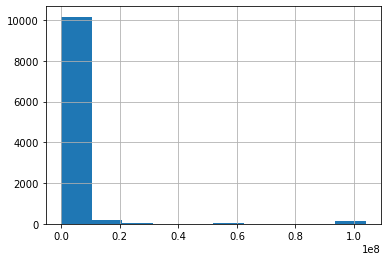

In [151]:
survey_data['NormalizedAnnualCompensation'].hist()

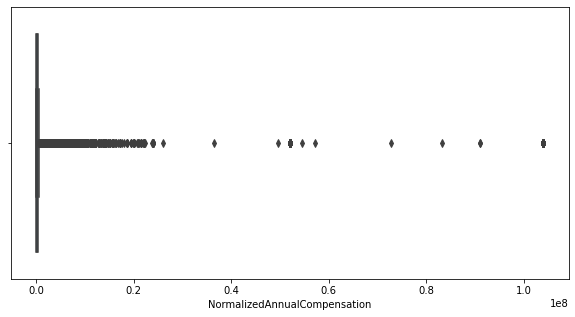

In [171]:
#Show outliers exist in the column NormalizedAnnualCompensation using a box plot

plt.figure(figsize=(10,5))
sns.boxplot(x=survey_data.NormalizedAnnualCompensation)
plt.show()

In [163]:
#Find out the Inter Quartile Range for the column NormalizedAnnualCompensation
survey_data['NormalizedAnnualCompensation'].describe()
#Find out the upper and lower bounds.
Q1 = survey_data['NormalizedAnnualCompensation'].quantile(0.25)
Q3 = survey_data['NormalizedAnnualCompensation'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

252764.0


In [166]:
#Identify how many outliers are there in the NormalizedAnnualCompensation column
outliers = (survey_data['NormalizedAnnualCompensation'] < (Q1 - 1.5 * IQR)) | (survey_data['NormalizedAnnualCompensation'] > (Q3 + 1.5 * IQR))
outliers.value_counts()

False    10075
True      1323
Name: NormalizedAnnualCompensation, dtype: int64

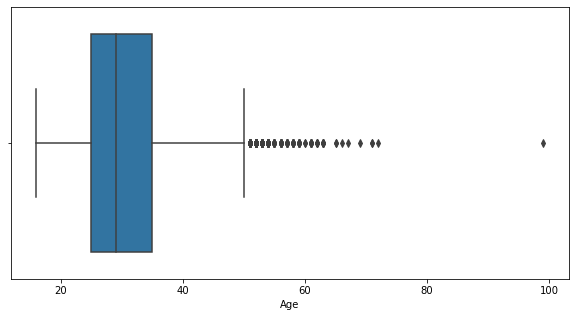

In [195]:
#Show outliers exist in the column Age using a box plot

plt.figure(figsize=(10,5))
sns.boxplot(x=survey_data.Age)
plt.show()

In [197]:
#Find out the Inter Quartile Range for the column Age
survey_data['Age'].describe()
#Find out the upper and lower bounds.
Q1_Age = survey_data['Age'].quantile(0.25)
Q3_Age = survey_data['Age'].quantile(0.75)
IQR_Age = Q3_Age - Q1_Age
print(IQR_Age)

10.0


In [198]:
#Identify how many outliers are there in the Age column
outliers_Age = (survey_data['Age'] < (Q1_Age - 1.5 * IQR_Age)) | (survey_data['Age'] > (Q3_Age + 1.5 * IQR_Age))
outliers_Age.value_counts()

False    11174
True       224
Name: Age, dtype: int64

In [205]:
#Create a new dataframe by removing the outliers from the NormalizedAnnualCompensation column
RemoveOutlier = survey_data[~(survey_data['NormalizedAnnualCompensation'] > (Q3 + 1.5 * IQR))]
RemoveOutlier.shape

(10075, 86)

In [207]:
#Create a new dataframe by removing the outliers from the Age column
RemoveOutlier_final = RemoveOutlier[~(RemoveOutlier['Age'] > (Q3_Age + 1.5 * IQR_Age))]
RemoveOutlier_final.shape

(9878, 86)

# Visualization

<AxesSubplot:>

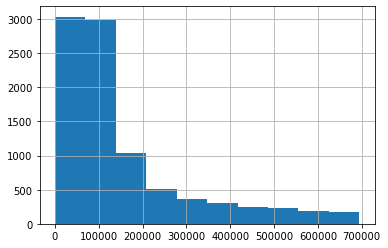

In [208]:
#Distribution of NormalizedAnnualCompensation after removing outliers

RemoveOutlier_final['NormalizedAnnualCompensation'].hist() 

<AxesSubplot:xlabel='Age', ylabel='NormalizedAnnualCompensation'>

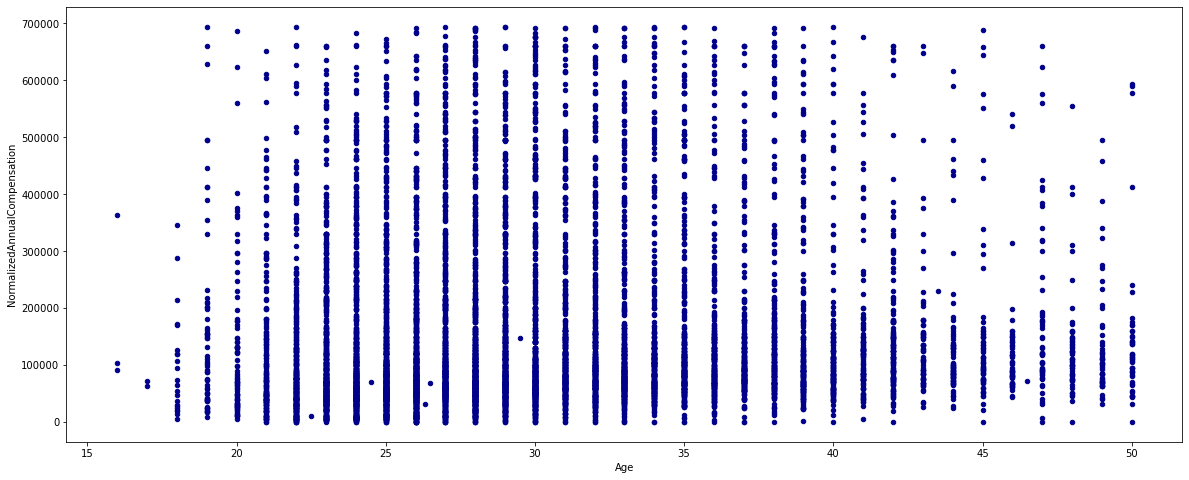

In [211]:
#Scatter plot between Age and NormalizedAnnualCompensation

RemoveOutlier_final.plot.scatter(x='Age',
                      y='NormalizedAnnualCompensation',
                      c='DarkBlue',
                      figsize = (20,8))

# Demographic

Text(0.5, 1.0, 'Top 10 countries with highest number of respondents')

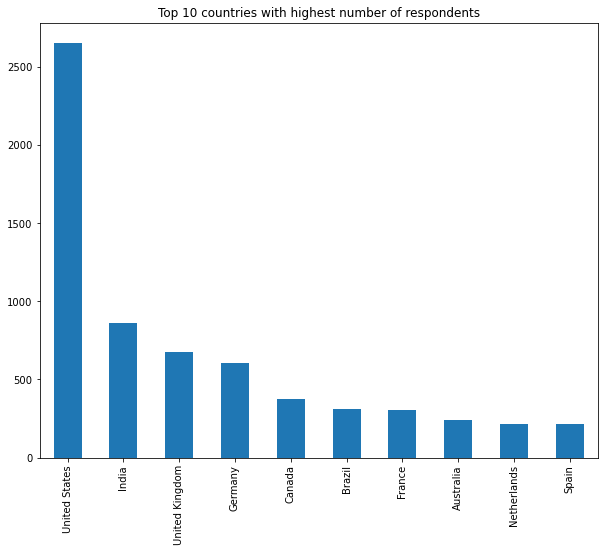

In [231]:
#Top 10 Languages

top_10_countries = RemoveOutlier_final['Country'].value_counts()[:10]
top_10_countries.plot(kind='bar',figsize=(10,8))
plt.title('Top 10 countries with highest number of respondents')

In [239]:
RemoveOutlier_final['Gender'].value_counts()

Man                                                            9047
Woman                                                           674
Non-binary, genderqueer, or gender non-conforming                51
Man;Non-binary, genderqueer, or gender non-conforming            22
Woman;Non-binary, genderqueer, or gender non-conforming          14
Woman;Man                                                         9
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: Gender, dtype: int64

In [244]:
Gender = RemoveOutlier_final['Gender']

In [257]:
Gender.value_counts().filter(items=['Man', 'Woman'])

Man      9047
Woman     674
Name: Gender, dtype: int64

<AxesSubplot:title={'center':'% respondents by gender'}>

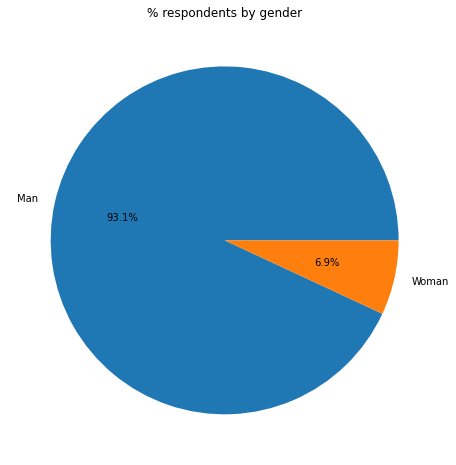

In [273]:
# % Respondents by Gender

Gender.value_counts().filter(items=['Man', 'Woman']).plot(kind='pie', y='Gender distribution', figsize = (15,8) , 
 title = '% respondents by gender' , ylabel = '' , autopct='%1.1f%%')


In [401]:
# Respondent count by Age

Age = RemoveOutlier_final['Age'].value_counts().reset_index()
Age.set_axis(['age', 'respondent'], axis='columns', inplace = True)
Age.set_index('age', inplace = True)
Age.sort_values(by=['age'] , inplace = True )

Text(0, 0.5, 'Respondent')

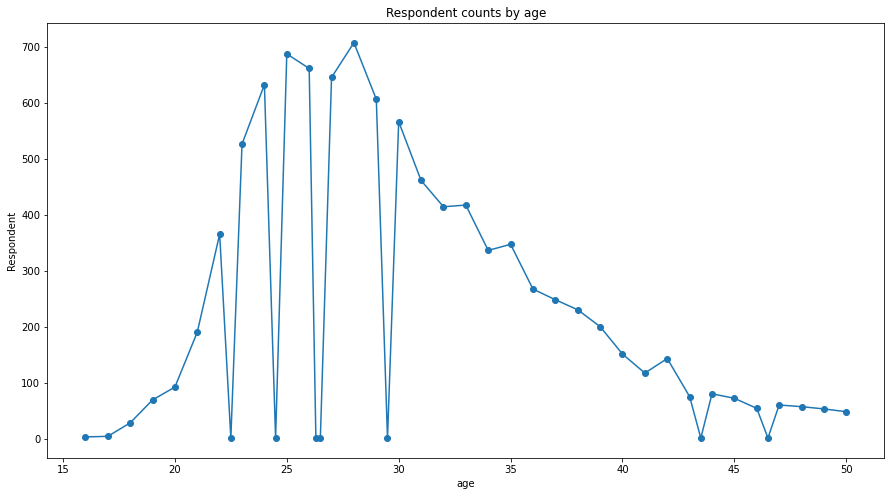

In [400]:
#Respondent counts by age

Age.plot.line(figsize=(15,8), legend=False, marker='o', use_index=True, title='Respondent counts by age')
plt.ylabel('Respondent')